# Projet P6 - Classifiez automatiquement des biens de consommation
*OPENCLASSROOMS - Parcours Data Scientist - Adeline Le Ray - 05/2024*
<hr>

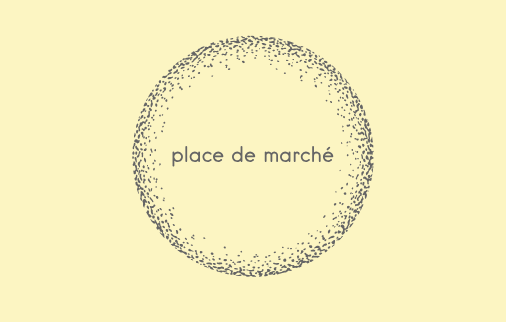

# Contexte
Place de marché souhaite élargir sa gamme de produits à l’épicerie fine. 

Pour cela, nous allons tester la collecte de produits à base de “champagne” via l'API Edamam Food and Grocery Database (=*a REST based API service for looking up nutrition and diet related data for food products*).
* **Objectif :** Extraire les 10 premiers produits à base de “champagne”  dans un fichier “.csv”, contenant pour chaque produit les données suivantes : foodId, label, category, foodContentsLabel, image.
* **Ressources :** 
    * [RapidAPI](https://rapidapi.com/edamam/api/edamam-food-and-grocery-database)
    * [Edamam Food and Grocery Database API Tutorial](https://rapidapi.com/blog/edamam-food-and-grocery-database-api-with-python-php-ruby-javascript-examples/)
    * [Requests python library documentation](https://requests.readthedocs.io/en/latest/user/quickstart/#make-a-request)

# Requête API

Les données ont été écrites dans 'champagne_products.csv'



,foodId,label,category,foodContentsLabel,image
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,N/A,https://www.edamam.com/food-img/a71/a718cf3c52...
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...,N/A
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.com/food-img/d88/d88b64d973...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...,N/A
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...,N/A
5,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...,https://www.edamam.com/food-img/ab2/ab2459fc2a...
6,food_alpl44taoyv11ra0lic1qa8xculi,Champagne Buttercream,Generic meals,sugar; butter; shortening; vanilla; champagne;...,N/A
7,food_am5egz6aq3fpjlaf8xpkdbc2asis,Champagne Truffles,Generic meals,butter; cocoa; sweetened condensed milk; vanil...,N/A
8,food_bcz8rhiajk1fuva0vkfmeakbouc0,Champagne Vinaigrette,Generic meals,champagne vinegar; olive oil; Dijon mustard; s...,N/A
9,food_a79xmnya6togreaeukbroa0thhh0,Champagne Chicken,Generic meals,"Flour; Salt; Pepper; Boneless, Skinless Chicke...",N/A



 Images associées aux 10 premiers produits contenant du champagne


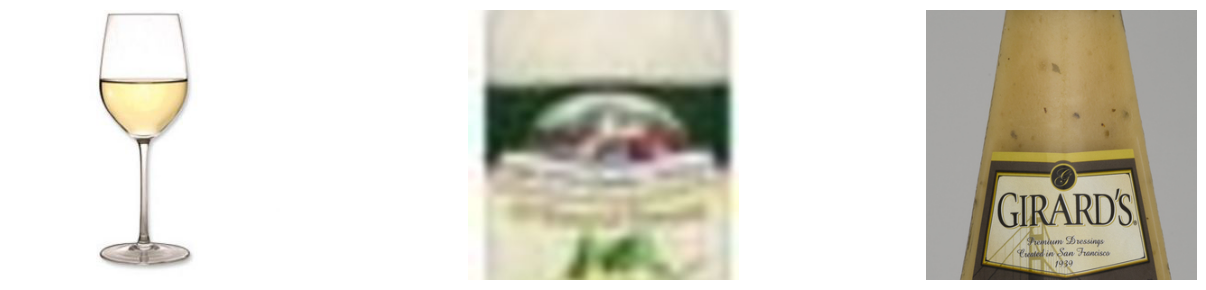

In [20]:
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Requête API : produits à base de champagne
url = "https://edamam-food-and-grocery-database.p.rapidapi.com/api/food-database/v2/parser"
querystring = {"ingr": "champagne"}
headers = {
    'x-rapidapi-key': "d7e15193d1msh3bbbd4bf0f8e587p1237c8jsnb00960269fc9",
    'x-rapidapi-host': "edamam-food-and-grocery-database.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

# Vérifier si la requête a été un succès
if response.status_code == 200:
    # Extraire les 10 premiers produits dans la liste 'hints'
    products = response.json().get('hints', [])[:10]
    
    # Récupérer les données foodId, label, category, foodContentsLabel, image de chacun des produits
    csv_data = []
    for product in products:
        # Récupérer les données de product
        food = product.get('food', {})
        # Récupérer foodId, label, category, foodContentsLabel, image
        foodId = food.get('foodId', 'N/A')
        label = food.get('label', 'N/A')
        category = food.get('category', 'N/A')
        foodContentsLabel = food.get('foodContentsLabel', 'N/A')
        image = food.get('image', 'N/A')
        csv_data.append([foodId, label, category, foodContentsLabel, image])

    # Créer le DataFrame
    df = pd.DataFrame(csv_data, columns=['foodId', 'label', 'category', 'foodContentsLabel', 'image'])

    # Enregistrer le DataFrame dans un fichier CSV
    df.to_csv('champagne_products.csv', index=False)

    print("Les données ont été écrites dans 'champagne_products.csv'\n")
    
    display(df)
    
    print("\n Images associées aux 10 premiers produits contenant du champagne")
    
    # Liste des url image disponibles
    url_list = df.loc[df['image']!='N/A', 'image']
    np_plots = min(len(url_list),10)  # Afficher jusqu'à 10 images
    fig, axes = plt.subplots(1, np_plots, figsize=(15, 3))

    # Affichez les images
    for i, url in enumerate(url_list):
        # Téléchargement de l'image
        response = requests.get(url)
        img_data = BytesIO(response.content)
        # Ouverture de l'image
        image = Image.open(img_data)

        if np_plots == 1:
            axes.imshow(image)
            axes.axis('off')
        else:
            axes[i].imshow(image)
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()
    
else:
    print("La requête a échoué avec le code d'état:", response.status_code)